### Important Dependencies

In [11]:
!pip install tweepy

In [12]:
!pip install -U spacy

  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.0
    Uninstalling spacy-3.2.0:
      Successfully uninstalled spacy-3.2.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~pacy\\attrs.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



### Download language model

In [1]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### 1. Get Data from Twitter

In [28]:
#Working with os
import os
# Working with twitter
import tweepy as tw
#For dataframes
import pandas as pd
#Real expressions
import re
import sys
#lemmatization and tokenization
#import spacy
# import nltk
# nltk.download()
#maxplotlib to plot values
import matplotlib.pyplot as plt


In [31]:
consumer_key ='hwvVU4iowWV7bhp7FDoNJqYOM'
consumer_secret ='RT7Loq8delJI4BuuNbhv0addVr9C9185vVgC8fy4Pg0dBITTvL'
access_token ='1446100251908083713-DTBe6pFMznYRckQ8GgjCuT3ug3Gfdb'
access_token_secret ='EaFfeN6mIilCifoffV0rj5NjsQGWukybQr9QRpt3LsfM3'


### Authentication

In [32]:
# Authenticate
auth=tw.OAuthHandler(consumer_key,consumer_secret)
# Set Tokens
auth.set_access_token(access_token,access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)


In [33]:
handle = '@Cristiano'

In [34]:
res =api.user_timeline(screen_name=handle, count=100, include_rts=True)

In [35]:
res

[Status(_api=<tweepy.api.API object at 0x0000011872C54E80>, _json={'created_at': 'Sun Dec 05 16:19:48 +0000 2021', 'id': 1467529145412468741, 'id_str': '1467529145412468741', 'text': 'Another good win. Keeps the run going with important games coming up 💪 https://t.co/LdsY3ao3Xf', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1467529140639256577, 'id_str': '1467529140639256577', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/FF21-mVWUAE99Ll.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FF21-mVWUAE99Ll.jpg', 'url': 'https://t.co/LdsY3ao3Xf', 'display_url': 'pic.twitter.com/LdsY3ao3Xf', 'expanded_url': 'https://twitter.com/HKane/status/1467529145412468741/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 470, 'resize': 'fit'}, 'large': {'w': 2048, 'h': 1416, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 830, 'resize': 'fit'}}}]}, 'extended_

### Select each sentence

In [36]:
tweets = [tweet.text for tweet in res]

In [37]:
tweets

['Another good win. Keeps the run going with important games coming up 💪 https://t.co/LdsY3ao3Xf',
 'Important win. Good to build some momentum going into a busy period. 💪 https://t.co/eh8oqfKz6j',
 'Just been sent this tweet and absolutely gutted for you! For your commitment and to make up for the match being cal… https://t.co/uP1cWz9r1x',
 'A legend of the game and a someone who knew where the back of the net was. A pleasure chatting to @delpieroale toda… https://t.co/HSOtZna5Cm',
 'Needed that! Second half performance was much better and the atmosphere was class 👏👏 #COYS https://t.co/ilzk2GrwTE',
 'I’ve gone for this classic @England kit for #FootballShirtFriday today 👌🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f \n\nWear your shirt, share on social… https://t.co/Dht5XCuLRU',
 'RT @sportbible: @HKane Harry and Ben are helping tackle bowel cancer by supporting #FootballShirtFriday on November 19 in aid of @BobbyMoor…',
 'RT @sportbible: Ben, an inspiring bowel cancer

### Join all sentences into a single text

In [38]:
text = ''.join(str(tweet) for tweet in tweets)

In [39]:
text

"Another good win. Keeps the run going with important games coming up 💪 https://t.co/LdsY3ao3XfImportant win. Good to build some momentum going into a busy period. 💪 https://t.co/eh8oqfKz6jJust been sent this tweet and absolutely gutted for you! For your commitment and to make up for the match being cal… https://t.co/uP1cWz9r1xA legend of the game and a someone who knew where the back of the net was. A pleasure chatting to @delpieroale toda… https://t.co/HSOtZna5CmNeeded that! Second half performance was much better and the atmosphere was class 👏👏 #COYS https://t.co/ilzk2GrwTEI’ve gone for this classic @England kit for #FootballShirtFriday today 👌🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f \n\nWear your shirt, share on social… https://t.co/Dht5XCuLRURT @sportbible: @HKane Harry and Ben are helping tackle bowel cancer by supporting #FootballShirtFriday on November 19 in aid of @BobbyMoor…RT @sportbible: Ben, an inspiring bowel cancer patient was given the surprise of a

In [53]:
adventure =['adventuresome', 'audacious', 'bold', 'daring', 'dashing', 'emboldened', 'enterprising', 'free-swinging', 'gutsy', 'hardy', 'nerved', 'nervy', 'venturesome', 'venturous','brash', 'daredevil', 'foolhardy', 'heedless', 'hotheaded', 'impetuous', 'imprudent', 'impulsive', 'incautious', 'madcap', 'overbold', 'overconfident', 'rash', 'reckless', 'thoughtless', 'wild','brave', 'courageous', 'dauntless', 'fearless', 'gallant', 'greathearted', 'heroic', 'intrepid', 'lionhearted', 'stalwart', 'stout', 'stouthearted', 'swashbuckling', 'unafraid', 'undaunted', 'valiant', 'valorous','brave', 'courageous', 'dauntless', 'fearless', 'gallant', 'greathearted', 'heroic', 'intrepid', 'lionhearted', 'stalwart', 'stouthearted', 'swashbuckling', 'unafraid', 'undaunted', 'valiant', 'valorous','gritty', 'plucky', 'spirited', 'spunky','absurd', 'asinine', 'balmy', 'brainless', 'crazy', 'foolish', 'half-witted', 'harebrained', 'insane', 'lunatic', 'mad', 'nutty', 'scatterbrained', 'silly', 'wacky','irrational', 'unreasonable' ]

art =['aesthetic','eventful','absolutely','creative','decorative','dramatic','imaginative','musical','cultivated','cultured','elegant','exquisite','fine','graceful','grand','harmonious','ideal','ornamental','pictorial','picturesque','pleasing','poetic','refined','rhythmical','sensitive','stimulating','stylish','sublime','tasteful','stylish','sublime','tasteful','adroitly','beautifully','delicately','easily','elegantly','graciously','neatly','nimbly','skillfully','smoothly','agilely','charmingly','daintily','delightfully','dexterously','exquisitely','felicitously','fitly','handsomely','harmoniously','pleasingly','rhythmically','sprucely','symmetrically','perfect','wonderful']

imagine =['adroitly',
'beautifully',
'delicately',
'easily',
'elegantly',
'graciously',
'neatly',
'nimbly',
'skillfully',
'smoothly',
'agilely',
'charmingly',
'daintily',
'delightfully',
'dexterously',
'exquisitely',
'felicitously',
'fitly',
'handsomely',
'harmoniously',
'pleasingly',
'rhythmically',
'surprise',
'sprucely',
'moment',
'buzzing',
'symmetrically','brainstorm', 'brainstorming', 'inspiration',
'fecundity', 'fertility',
'ingenuity', 'resourcefulness','versatility',
'chimera', 'daydream', 'delusion', 'dream', 'figment', 'hallucination', 'illusion', 'mirage', 'phantasm', 'pipe dream','envisaging', 'visualization']

intellect =['brain', 'brainiac', 'genius', 'thinker', 'whiz', 'wiz', 'wizard','polyhistor', 'polymath', 'Renaissance','geek', 'longhair', 'nerd','blue', 'bluestocking', 'highbrow', 'intellectual','master', 'virtuoso','ace', 'crackerjack', 'natural','sage', 'savant','eggheadedness', 'highbrowism', 'intellectualism','acumen', 'alertness', 'apprehension', 'astuteness', 'discernment', 'discriminability', 'insight', 'judgment', 'perception', 'percipience', 'perspicacity','sagacity', 'sapience', 'wisdom', 'wit','common sense', 'horse sense', 'mother wit','aptitude', 'talent']


auth_ch= ['arduous', 'Augean', 'backbreaking', 'demanding', 'difficult', 'effortful', 'exacting', 'formidable', 'grueling', 'hard', 'heavy', 'hellacious', 'herculean', 'killer', 'laborious', 'moiling', 'murderous', 'pick-and-shovel', 'rigorous', 'rough', 'rugged', 'severe', 'stiff', 'strenuous', 'sweaty', 'tall', 'testing', 'toilsome', 'tough', 'uphill','abstract', 'abstruse', 'complex', 'complicated', 'elusive', 'hairy', 'insoluble', 'intricate', 'involved', 'knotty', 'opaque', 'problematic', 'recondite', 'serious', 'spiny', 'stubborn', 'thorny', 'ticklish', 'tricky','pro', 'professional','consultant', 'hired gun', 'specialist','addict', 'aficionado', 'buff', 'devotee', 'enthusiast', 'fan','craftsman', 'journeyman','all-rounder', 'jack-of-all-trades','mistress']

achievement_striving=['accomplishment','attainment','creation','deed','effort','feat','performance','realization','success',
'triumph','victory','acquirement','acquisition','act','actualization','completion','conquest','consummation','contrivance',
'effectuation','enactment','encompassment','execution','exploit','fulfillment','hit','masterpiece','production','stroke',
'bang away', 'beaver', 'dig', 'drudge', 'endeavor', 'fag', 'grub', 'hump', 'hustle', 'labor', 'moil', 'peg', 'plod', 'plow', 
'plug', 'slave', 'slog', 'strain', 'struggle', 'sweat', 'toil', 'travail', 'tug', 'apply', 'buckle', 'hammer', 'knuckle down',
'pitch','attack', 'drive essay', 'exert', 'overexert', 'overwork', 'grind', 'put out', 'scrabble', 'scratch','trudge', 'wade']


cautiousness=['careful','wary','aware','heedful','attentive','alert','watchful','vigilant','circumspect','prudent',
'guarded','chary','mindful','cagey','alertness' ,'care', 'carefulness', 'caution', 'chariness', 'circumspection', 'gingerliness', 
'guardedness', 'heedfulness', 'prudence', 'wariness','attentiveness', 'observance', 'vigilance', 'watchfulness foresight', 
'foresightedness', 'providence calculation', 'canniness', 'deliberateness', 'deliberation', 'shrewdness','cautiously','cautious'
'cautiousness']


orderliness=['arrangement','classification','design','form','order','organization','pattern','plan','planning','purpose',
'regularity','structure','system','systematization','coordination', 'correlation', 'correspondence', 'equalization', 'equilibrium', 
'evenness', 'order', 'regularity','uniformity balance', 'coherence', 'concinnity', 'consonance', 'consonancy', 'harmony', 
'orchestration', 'proportion', 'symmetry', 'symphony', 'unity','orderings','orderliness','orderly','method']

self_discipline=['continence', 'restraint', 'self-command', 'self-containment', 'self-control', 'self-government', 'self-mastery',
'self-possession', 'self-restraint', 'will', 'willpower','self-abnegation', 'self-denial' ,'moderateness', 'moderation', 
'temperance', 'temperateness', 'determination', 'nerve command', 'control', 'discipline', 'mastery abnegation', 'abstention', 
'avoidance', 'eschewal', 'forbearance abstinence', 'soberness', 'sobriety aplomb', 'assurance', 'composure', 'confidence', 
'coolness', 'equanimity', 'poise', 'self-confidence','discretion','self-directed','self-discipline','self-disciplined']


self_efficiency=['self-effacing' ,'self-effacement', 'self-effacingly', 'self-effacements', 'self-efficacies','self-efficiency',
'personal efficacy','confidence in ones own abilities','belief in ones ability to succeed','self-belief','self-motivation',
'self belief','self efficacy','self-acceptance','self-actualisation','self-actualization','self-analysis','self-awareness',
'self-concept','self-consciousness','self-conviction','self-determination','self-devotion','self-disgust','self-energy',
'self-esteem','self-fulfillment','self-gratification','self-harm','self-hatred','self-help','self-identification','self-image',
'self-importance','self-improvement','self-knowledge','self-love','self-mastery','I','we','us','helping','team','forward']

activity_level=['activity rate','activities as a whole','activities in general','activity amount','activity generally',
'activity in general','amount of activity','campaign activity level','degree of activity','employment rate','employment rates',
'innovation in general','labour force participation','level of activities','level of activity','level of economic activity',
'level of employment','level of operation','level of outputs','levels of activity','levels of economic activity','output level',
'overall activity','overall operations','participation rate','activity level','support','inspiring','wishes']


assertiveness=['conclusiveness','decisiveness','determination','emphaticalness','firmness','purpose','purposefulness','resoluteness',
'resolution','resolve','willpower','aggressiveness','emphasis','fierceness','forcefulness','intenseness','intensity','vehemence',
'vigorousness','violence','potency','power','strength','eloquence','ardency','ardor','fervency','fervidness','fervor',
'insistence','passion','warmth','stridency','vociferousness','absoluteness','clearness','directness','incision','incisiveness',
'plainness','straightforwardness','vividness','assertive','assertiveness','win','focus','forward','try','better','cant wait','move','till the end','looking forward']

cheerfulness=['animated','bright','buoyant','cheery','chipper','chirpy','effervescent','enthusiastic','good-natured','happy',
'jaunty','jolly','joyful','lighthearted','lively','merry','optimistic','peppy','perky','pleasant','rosy','sanguine','sunny',
'upbeat','airy','blithe','bouncy','bucked','contented','enlivening','full of pep','gay','glad','gladsome','good-humored',
'hearty','high','hilarious','hopeful','in good spirits','in high spirits','jocund','roseate','snappy','sparkling','sprightly',
'up','vivacious','winsome','zappy','zingy','zippy','cheerful','blithely','brightly','gaily','genially','gladly','gleefully',
'happily','joyfully','merrily','optimistically','playfully','pleasantly','readily','willingly','airil','buoyantly','elatedly',
'hopefully','jovially','lightheartedly','mirthfully','sportively','cheerfully','animation','buoyancy','cheer','comfort',
'delight','encouragement','exuberance','gaiety','geniality','gladness','glee','hilarity','hopefulness','jauntiness','jocundity',
'joy','joyousness','liveliness','merriment','mirth','optimism','solace','cheeriness','good cheer','light-heartedness','cheerfulness']


excitement=['adventure','buzz','commotion','confusion','drama','elation','emotion','feeling','frenzy','furor','fuss','hysteria',
'motivation','passion','rage','thrill','trepidation','tumult','turmoil','warmth','action','activity','ado','agitation',
'animation','bother','discomposure','disturbance','dither','excitation','ferment','fever','flurry','heat','hubbub','hullabaloo',
'hurry','impulse','instigation','intoxication','kicks','melodrama','motive','movement','perturbation','provocation','stimulation',
'stimulus','stir','titillation','to-do','urge','wildness','exicted','agitated','annoyed','delighted','disturbed','eager',
'enthusiastic','hysterical','nervous','passionate','thrilled','animated','aroused','awakened','charged','discomposed',
'disconcerted','inflamed','moved','piqued','provoked','roused','ruffled','stimulated','stirred','wired','aflame','beside oneself',
'feverish','fired up','frantic','high','hot','hot and bothered','hyperactive','in a tizz','juiced up','jumpy','keyed-up',
'on edge','on fire','overwrought','steamed up','tumultous/tumultuous','wild','worked-up','zipped up','exitedly','exitedeness']


outgoing=['extrovert', 'uninhibited', 'unreserved', 'demonstrative', 'affectionate', 'warm', 'friendly', 'genial', 'cordial', 
'affable', 'easy-going','easy', 'hail-fellow-well-met', 'approachable', 'sociable', 'convivial', 'lively', 'gregarious', 
'attention-seeking','communicative','responsive', 'open', 'forthcoming', 'frank', 'expansive','talkative', 'garrulous', 
'loquacious','departing', 'retiring', 'leaving']


cooperation =["teamwork","collaboration","partnership","unite","compatible","aid","unanimity","associative","join effort",
             "conspiracy","participation","coadjuvency","gratify","harmony","association","cooperative","collaborate",
             "malleable","symbiotic","synergetic","synergic","tractable","altruism","mutualism","mutuality","commentsalism",
              "mutuality","parasitism","reciprocality","reciprocity","synergism","concur","connive","cooperate","affiliation",
             "alliance","connection","combination","concert","concurrence","coalition","confederation","fusion","federation",
             "bipartitionship","concord","solidarity","interaction","synergy","coaction","collusion","connivance","complicity",
             "team spirit","espirit de corps","help","service","accomodating","collaborative","flexible","information sharing",
             "mutual understanding"]

modesty =['modest','decency','delicacy','courtecy','purity','unassumingness','unpretentiousness',
          'reserve','diffidence','inhibition','innocence','seamliness','dignity','shyness',
          'restraint','chastity','virtue','chaste','decorous','humble','moderate','shyness',
          'unassuming','unpretentious','unobstructive','virginal','virtous','bashfulness','coyness',
          'demureness','maidenliness','pudency','sufficiency','humbleness','lowliness','meekness',
          'virtousness','simpleness','simplicity','humility','self-effacement','meekness','diffidity',
          'attitude','modestness','timidity','diffident','sincerity','gentleness','civility','cheerfulness',
         'fastdiousness','affectation','coolness','piety','stoicism','sorry','humbly','thank you','see you','welcome','thanks','congrats']


sympathy =['understanding','compassion','feeling','love','condolence','consolation','concord','comfort','encouragement','pity',
          'kindheartedness','empathy','harmony','kindness','unity','affinity','accord','solace','cheer','reassurance','alliance',
          'agreement','favor','fellow-feeling','mercy','rapport','sorrow','support','tenderness','warmth','understanding','gratitude',
          'admiration','affection','disastate','sincere','disguest','contempt','indignation','regret','humaness','humanity','kindliness',
          'kindness','ruth','softhertedness','warmheartedness','altruism','benevolence','benignity','bigheartedness','charity','genourously',
          'goodwill','humanitarinism','largeheartedness','magnanimity','philanthropy','goodwill']


trust =['believe in','duty','mainstay','confidence','reliance','good angel','confide','take at ones word','reckon on','credence',
        'commit','supervision','cartel','gardian','guardianship','dependence','entrust','charge','commission','entrust','intrust',
        'confer','combination','anchor','security','support','benefactor','corporation','learn-on','affiance','coalition','belief',
        'rely-on','relegate','money','trust','corporate trust','assurance','patron','protector','conglomerate','esteem','turn-to',
         'fall-back-on','presume','let-out','keeping','count on','faith','rely','believe','desire','moment','monopoly','care','custody',
         'trustingness','liability','take','imagine','commission','transfer','give over','advance','grant','superintendence','combine'
         'syndicate','comment','consign','give','care for','bank','hope','loan','swear','account','trustfulness','guarantee','credit',
         'assume','buisness','organization','responsibility','let','aid','patronize','dependable','trustworthy','loyality','protection',
         'safekeeping','partnership']


altruism =['benevolence','generosity','charitableness','charity','goodwill','beneficence','grace','kindheartedness','kindliness','kindness',
           'philanthropy','attitude','kind','selflessness','self-devotion','self-forgetfulness','self-immolation','self-renouncement',
           'unaquisitiveness','unpossessiveness','reciprocity','rationality','altruistic','self-interest','egoistic','selfishness','mutuality',
           'individualism','benignancy','benignacy','benignity','humanitarianism','magnanimity','benefaction','goodness','goodwill','philanthropy',
           'generosity','goodwill','goodness','tenderness','sympathy','unselfishness','compassion','charitableness','affection','you','helping','take','sponsorship','honour','present']



uncompromise =['adamant','determined','firm','fixed','hang-tough','immovable','inexorable','inflexible','insistent','obdurate','relentless','resolute',
             'rigid','stubborn','unbendable','uncompromising','unshakable','unswayable','firm','hardheaded','implacable','inflexible','intrasigent','opiniated',
              'pigheaded','rigid','unbendable','unbending','unbreakable','uncompliant','uncompromising','unrelenting','unyielding','confirmed','genuine','hardened',
              'exaggerated','exceptional','excessive','extraordinary','fabulous','harsh','immoderate','improper','improper','imprudent','inordinate','intemperate',
              'irrational','nonsensical','outrageous','overkill','radical','remarkable','severe','uncompromising','unreasonable','unusual','uncommon','hardheaded',
              'stubborn','uncompromising','unyielding','unbending','stubborn','immovable','secure','inflexible','unshakable','source','back','solidarity']

self_conscieousness =['uneasiness','unconfortableness','sameness','purposefulness','self-knowledge','selfhood','instinctual',
                     'inwardness','unawareness','subjectivity','transcendence','individuation','self-reference','intentionality',
                      'consciousness','selfawareness','otherness','self-identity','self-identity','introspection','embarressed',
                       'shy','insecure','awkward','bashful','unnatural','humble','uneasy','unconfident','guarded','unsure','uncertain',
                      'doubtful','reserved','nervous','uncomfortable','reticent','diffident','self-reflexive','reverential','self-consciously',
                      'pretentious','I','team','captain','goal','win']


immoderation =['excess','excessiveness','exorbitance','immoderacy','insobriety','intemperance','intemperteness','nimiety','extravagance',
              'prodigality','extremism','irrationality','radicalism','unreasonableness','boundless','endless','immeasurable','infinite',
               'limitless','unbearable','unjustifiable','unwarrented','improper','inappropriate','thick','unseemly','unrestrained',
               'dizzying','egregious','enormous','exaggerated','exorbitant','exorbitant','extravagant','inordinate','intemperate','profligate'
                'steep','too-much','unbalanced','unbridled','uncontrolled','undue','unjustified','unmeasurable','unreasonable','unwarrented']



prone_to_worry =['agitation','anxiety','anxiousness','apprehention','apprehensiveness','care','concern','despair','accept','abide','bear',
                 'endure','stickout','sustain','tolerate','agitate','alarm','bother','bother','concern','discomfort','discompose','dismay',
                 'disquite','distemper','distract','distress','disturb','flurry','freak','fuss','hagride','undo','unhinge','unsettle','upset',
                 'weird-out','aggravate','anger','annoy','bug','grate','harrss','irk','irritate','haunt','plague','abash','confuse','confound'
                  'discomfit','disconcert','discountenance','embarrass','mortify','nonplus','demoralize','dicourage','dishearten','dispirit',
                  'unnerve','strain','stress','tension','desperateness','desperation','discomfort','discomposure','dismay','distraction','distress',
                   'disturbance','edginess','jitters','jumpiness','panic','fearfulness','upset','doubt','dread','misgiving','presentiment','suspense']



susceptible_to_stress =['bother','pressure','strain','tension','anxiety','concern','uneasiness','worry','aggravation','anger', 
                       'annoyance','exasperation','irritation','persecution','trouble','accent','accentuation','focus','spotlight',
                       'cosequence','import','moment','note','significance','value','primacy','priority','consideration','regard',
                       'bothor','fear','fuss','sweat','trouble','agonize','chafe','yearn','despair','emphasize','underscore','amplify','boost']


fiery =['burning','hot','angry','fierce','hotheaded','feverish','inflammable','pyric','hot-blooded','action','feelings','combustive','firelike',
       'firelike','ferocious','fearsome','flame','thunder','animated','ardent','choleric','flammable','impulsive','blistering','enthusiastic',
       'excitable','flaming','baking','heated','roasting','scorching','searing','sizzling','mettlesome','sultry','swltering','peppery','spirited',
        'fervent','fervid','passionate','igneous','impassioned','glowing','impetous','evangelistic','inflamed','intense','irascible','irritable',
       'rash','spunky','violent','snappy','vibrant','dythyrambic','blazing','broiling','warm-blooded','superheated','charged','emotional','torrid',
       'warm','gushy','infactuated','obsessed','uninhibited','unreserved','unrestrained','overexcited','enamored','overemotional','overheated','pushy',
       'sparky','ardent','impassioned','passionate','emphatic','obstrutive']


In [41]:
c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=c11=c12=c13=c14=c15=c16=c17=c18=c19=c20=c21=c22=c23=c24=c25=c26=0

### Removing emoji

In [42]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

if __name__ == '__main__':
    text = remove_emoji(text)
    print(text)

Another good win. Keeps the run going with important games coming up  https://t.co/LdsY3ao3XfImportant win. Good to build some momentum going into a busy period.  https://t.co/eh8oqfKz6jJust been sent this tweet and absolutely gutted for you! For your commitment and to make up for the match being cal… https://t.co/uP1cWz9r1xA legend of the game and a someone who knew where the back of the net was. A pleasure chatting to @delpieroale toda… https://t.co/HSOtZna5CmNeeded that! Second half performance was much better and the atmosphere was class  #COYS https://t.co/ilzk2GrwTEI’ve gone for this classic @England kit for #FootballShirtFriday today 󠁧󠁢󠁥󠁮󠁧󠁿 

Wear your shirt, share on social… https://t.co/Dht5XCuLRURT @sportbible: @HKane Harry and Ben are helping tackle bowel cancer by supporting #FootballShirtFriday on November 19 in aid of @BobbyMoor…RT @sportbible: Ben, an inspiring bowel cancer patient was given the surprise of a lifetime when England captain @HKane popped up on video…Back t

### Removing URL

In [43]:
text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
text

"Another good win. Keeps the run going with important games coming up   win. Good to build some momentum going into a busy period.   been sent this tweet and absolutely gutted for you! For your commitment and to make up for the match being cal…  legend of the game and a someone who knew where the back of the net was. A pleasure chatting to @delpieroale toda…  that! Second half performance was much better and the atmosphere was class  #COYS  gone for this classic @England kit for #FootballShirtFriday today \U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f \n\nWear your shirt, share on social…  @sportbible: @HKane Harry and Ben are helping tackle bowel cancer by supporting #FootballShirtFriday on November 19 in aid of @BobbyMoor…RT @sportbible: Ben, an inspiring bowel cancer patient was given the surprise of a lifetime when England captain @HKane popped up on video…Back to back!  What a way to seal our World Cup spot and finish the campaign on a high.  Have seen your message a

### Removing hashtags and usernames

In [48]:
clean_text = re.sub("@[A-Za-z0-9_]+","", text)
clean_text = re.sub("#[A-Za-z0-9_]+","", clean_text)
 
clean_text

"Another good win. Keeps the run going with important games coming up   win. Good to build some momentum going into a busy period.   been sent this tweet and absolutely gutted for you! For your commitment and to make up for the match being cal…  legend of the game and a someone who knew where the back of the net was. A pleasure chatting to  toda…  that! Second half performance was much better and the atmosphere was class    gone for this classic  kit for  today \U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f \n\nWear your shirt, share on social…  :  Harry and Ben are helping tackle bowel cancer by supporting  on November 19 in aid of …RT : Ben, an inspiring bowel cancer patient was given the surprise of a lifetime when England captain  popped up on video…Back to back!  What a way to seal our World Cup spot and finish the campaign on a high.  Have seen your message and your brilliant drawing Mike thanks a lot for both of them! Can you please se…  night! One step closer…   w

### Stemming

In [45]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [46]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [49]:
res = clean_text.split()
res
for i in res:
    print(i)
for i in res:
    x=porter.stem(i)
    print(x)
    
for i in res:
    for j in adventure:
        if i.find(j) != -1:
            c1=c1+1
print(c1)
c1=c1/(len(adventure))
print(c1)


Another
good
win.
Keeps
the
run
going
with
important
games
coming
up
win.
Good
to
build
some
momentum
going
into
a
busy
period.
been
sent
this
tweet
and
absolutely
gutted
for
you!
For
your
commitment
and
to
make
up
for
the
match
being
cal…
legend
of
the
game
and
a
someone
who
knew
where
the
back
of
the
net
was.
A
pleasure
chatting
to
toda…
that!
Second
half
performance
was
much
better
and
the
atmosphere
was
class
gone
for
this
classic
kit
for
today
󠁧󠁢󠁥󠁮󠁧󠁿
Wear
your
shirt,
share
on
social…
:
Harry
and
Ben
are
helping
tackle
bowel
cancer
by
supporting
on
November
19
in
aid
of
…RT
:
Ben,
an
inspiring
bowel
cancer
patient
was
given
the
surprise
of
a
lifetime
when
England
captain
popped
up
on
video…Back
to
back!
What
a
way
to
seal
our
World
Cup
spot
and
finish
the
campaign
on
a
high.
Have
seen
your
message
and
your
brilliant
drawing
Mike
thanks
a
lot
for
both
of
them!
Can
you
please
se…
night!
One
step
closer…
will
remember
them.
games
to
go.
We
know
what
needs
to
be
done.
🦁🦁🦁
All
profits
f

### Using LSA and LIWC to calculate word count percentage

In [54]:
for i in res:
    for j in adventure:
        if i.find(j) != -1:
            c1=c1+1
c1=c1/(len(adventure))
print(c1)

for i in res:
    for j in art:
         if i.find(j) != -1:
            c2=c2+1
c2=c2/(len(art))
print(c2)
       # x = set(i).issubset(j)
     #   if x:
      #      c2=c2+1
       # if i == j:
        #    c2=c2 + 1

        # print(c2)

for i in res:
    for j in imagine:
         if i.find(j) != -1:
            c3=c3+1
c3=c3/(len(imagine))
print(c3)
       # x = set(i).issubset(j)
      #  if x:
      #      c3=c3+1
       # if i == j:
        #    c3=c3 + 1

        # print(c3)

for i in res:
    for j in intellect:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c4=c4+1
c4=c4/(len(intellect))
      #  if i == j:
      #      c4=c4 + 1

print(c4)

for i in res:
    for j in auth_ch:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c5=c5+1
c5=c5/(len(auth_ch))
      #  if i== j:
      #      c5=c5 + 1

print(c5)

for i in res:
    for j in achievement_striving:
      #  x = set(i).issubset(j)
        if i.find(j) != -1:
            c6=c6+1
c6=c6/(len(achievement_striving))
      #  if i == j:
       #     c6=c6 + 1

print(c6)

for i in res:
    for j in cautiousness:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c7=c7+1
c7=c7/(len(cautiousness))
      #  if i == j:
       #     c7=c7 + 1

print(c7)

for i in res:
    for j in orderliness:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c8=c8+1
c8=c8/(len(orderliness))
      #  if i == j:
       #     c8=c8 + 1

print(c8)

for i in res:
    for j in self_discipline:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c9=c9+1
c9=c9/(len(self_discipline))
         #   if i== j:
          #      c9=c9 + 1

print(c9)

for i in res:
    for j in self_efficiency:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c10=c10+1
c10=c10/(len(self_efficiency))
       # if i == j:
        #        c10=c10 + 1

print(c10)

for i in res:
    for j in activity_level:
       # x = set(i).issubset(j)
       if i.find(j) != -1:
            c11=c11+1
c11=c11/(len(activity_level))
      #  if i == j:
       #     c11=c11 + 1

print(c11)

for i in res:
    for j in assertiveness:
      #  x = set(i).issubset(j)
        if i.find(j) != -1:
            c12=c12+1
c12=c12/(len(assertiveness))
      #  if i == j:
       #     c12=c12 + 1

print(c12)

for i in res:
    for j in cheerfulness:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c13=c13+1
c13=c13/(len(cheerfulness))
      #  if i == j:
       #     c13=c13 + 1

print(c13)

for i in res:
    for j in excitement:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c14=c14+1
c14=c14/(len(excitement))
      #  if i == j:
       #     c14=c14 + 1

print(c14)

for i in res:
    for j in outgoing:
      #  x = set(i).issubset(j)
       if i.find(j) != -1:
            c15=c15+1
c15=c15/(len(outgoing))
    #    if i == j:
     #       c15=c15 + 1

print(c15)

for i in res:
    for j in cooperation:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c16=c16+1
c16=c16/(len(cooperation))
       # if i == j:
        #    c16=c16 + 1

print(c16)

for i in res:
    for j in modesty:
      #  x = set(i).issubset(j)
        if i.find(j) != -1:
            c17=c17+1
c17=c17/(len(modesty))
     #   if i == j:
     #       c17=c17 + 1

print(c17)

for i in res:
    for j in sympathy:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c18=c18+1
c18=c18/(len(sympathy))
      #  if i == j:
       #     c18=c18 + 1

print(c18)

for i in res:
    for j in trust:
        # x = set(i).issubset(j)
        if i.find(j) != -1:
            c19=c19+1
c19=c19/(len(trust))
     #   if i == j:
      #      c19=c19 + 1

print(c19)

for i in res:
    for j in uncompromise:
       # x = set(i).issubset(j)
       if i.find(j) != -1:
            c20=c20+1
c20=c20/(len(uncompromise))
    #    if i == j:
     #       c20=c20 + 1

print(c20)

for i in res:
    for j in altruism:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c21=c21+1
c21=c21/(len(altruism))
      #  if i == j:
       #     c21=c21 + 1

print(c21)

for i in res:
    for j in prone_to_worry:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c22=c22+1
c22=c22/(len(prone_to_worry))
        # if i == j:
          #  c22=c22 + 1

print(c22)

for i in res:
    for j in immoderation:
      #  x = set(i).issubset(j)
       if i.find(j) != -1:
            c23=c23+1
c23=c23/(len(immoderation))
      #  if i == j:
       #     c23=c23 + 1

print(c23)

for i in res:
    for j in fiery:
       # x = set(i).issubset(j)
       if i.find(j) != -1:
            c24=c24+1
c24=c24/(len(fiery))
      #  if i == j:
       #     c24=c24 + 1

print(c24)

for i in res:
    for j in self_conscieousness:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c25=c25+1
c25=c25/(len(self_conscieousness))
      #  if i == j:
       #     c25=c25 + 1

print(c25)

for i in res:
    for j in susceptible_to_stress:
       # x = set(i).issubset(j)
        if i.find(j) != -1:
            c26=c26+1
c26=c26/(len(susceptible_to_stress))
       # if i == j:
        #    c26=c26 + 1

print(c26)
        

0.02409634488716121
0.03507728894173603
0.15210502489814395
0.41285649615210507
0.218698224852071
0.08953287197231834
0.027757487216946673
0.16654492330168005
0.07889546351084811
0.8367768595041323
0.28537455410225926
0.5190459238163048
0.30690119184928877
0.08910034602076124
0.03329864724245577
0.09833506763787721
0.048374905517762655
0.18960068945705258
0.25271739130434784
0.1111111111111111
0.6860207100591715
0.012343842950624628
0.0
0.024996189605243104
0.6736079674060661
0.09750566893424036


### Lemmatization and Tokenization

In [52]:
sp = spacy.load("en_core_web_sm")
text1=sp(clean_text)

for word in text1:
    print(word.text, word.pos_, word.lemma_)

Another DET another
good ADJ good
win NOUN win
. PUNCT .
Keeps VERB keep
the DET the
run NOUN run
going VERB go
with ADP with
important ADJ important
games NOUN game
coming VERB come
up ADP up
   SPACE   
win NOUN win
. PUNCT .
Good ADJ good
to PART to
build VERB build
some DET some
momentum NOUN momentum
going VERB go
into ADP into
a DET a
busy ADJ busy
period NOUN period
. PUNCT .
   SPACE   
been AUX be
sent VERB send
this DET this
tweet NOUN tweet
and CCONJ and
absolutely ADV absolutely
gutted VERB gutte
for ADP for
you PRON you
! PUNCT !
For ADP for
your PRON your
commitment NOUN commitment
and CCONJ and
to PART to
make VERB make
up ADP up
for ADP for
the DET the
match NOUN match
being AUX be
cal ADJ cal
… PUNCT …
  SPACE  
legend NOUN legend
of ADP of
the DET the
game NOUN game
and CCONJ and
a DET a
someone PRON someone
who PRON who
knew VERB know
where SCONJ where
the DET the
back NOUN back
of ADP of
the DET the
net NOUN net
was AUX be
. PUNCT .
A DET a
pleasure NOUN pleasure
ch

### 

### Plot the scores

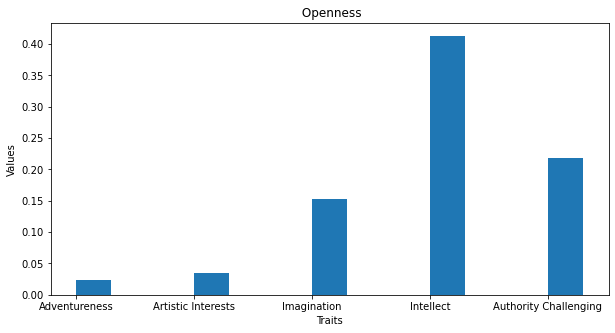

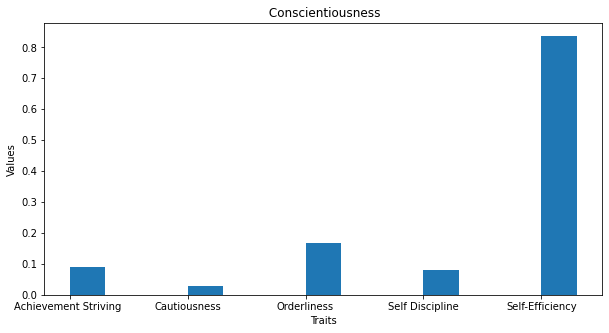

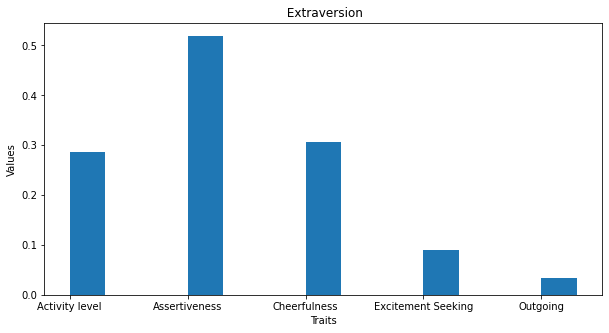

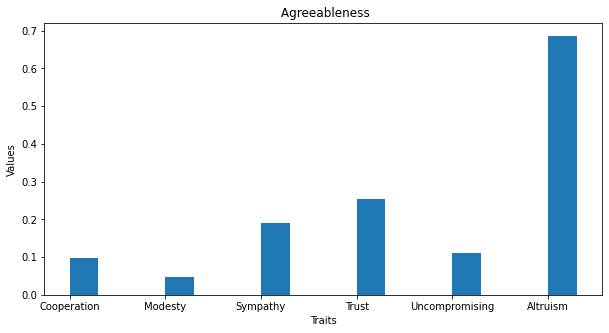

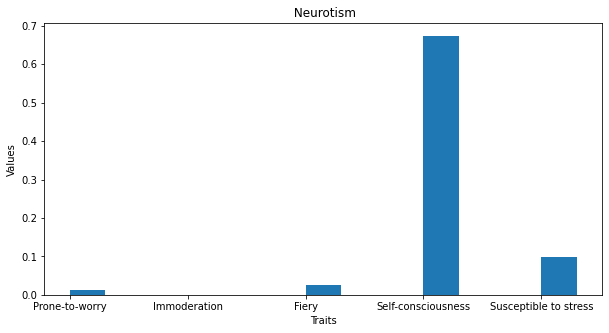

In [55]:
x=['Adventureness', 'Artistic Interests', 'Imagination', 'Intellect', 'Authority Challenging']
 
# giving the values against
# each value at x axis
y=[c1,c2,c3,c4,c5]
plt.figure(figsize=(10, 5))
plt.bar(x, y, align='edge', width=0.3)
 
# setting x-label
plt.xlabel("Traits")
 
# setting y_label 
plt.ylabel("Values")  
plt.title(" Openness")
plt.show()

x=['Achievement Striving ', 'Cautiousness', 'Orderliness', 'Self Discipline', 'Self-Efficiency']
 
# giving the values against
# each value at x axis
y=[c6,c7,c8,c9,c10]
plt.figure(figsize=(10, 5))
plt.bar(x, y, align='edge', width=0.3)
 
# setting x-label
plt.xlabel("Traits")
 
# setting y_label 
plt.ylabel("Values")  
plt.title(" Conscientiousness")
plt.show()

x=['Activity level', 'Assertiveness', 'Cheerfulness', 'Excitement Seeking', 'Outgoing']
 
# giving the values against
# each value at x axis
y=[c11,c12,c13,c14,c15]
plt.figure(figsize=(10, 5))
plt.bar(x, y, align='edge', width=0.3)
 
# setting x-label
plt.xlabel("Traits")
 
# setting y_label 
plt.ylabel("Values")  
plt.title(" Extraversion")
plt.show()

x=['Cooperation', 'Modesty', 'Sympathy', 'Trust', 'Uncompromising','Altruism']
 
# giving the values against
# each value at x axis
y=[c16,c17,c18,c19,c20,c21]
plt.figure(figsize=(10, 5))
plt.bar(x, y, align='edge', width=0.3)
 
# setting x-label
plt.xlabel("Traits")
 
# setting y_label 
plt.ylabel("Values")  
plt.title(" Agreeableness")
plt.show()

x=['Prone-to-worry', 'Immoderation', 'Fiery', 'Self-consciousness', 'Susceptible to stress']
 
# giving the values against
# each value at x axis
y=[c22,c23,c24,c25,c26]
plt.figure(figsize=(10, 5))
plt.bar(x, y, align='edge', width=0.3)
 
# setting x-label
plt.xlabel("Traits")
 
# setting y_label 
plt.ylabel("Values")  
plt.title(" Neurotism")
plt.show()

### Analysis on Personality

### Integration to flask